In [1]:
import numpy
import scipy
print("NumPy version:", numpy.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 1.24.3
SciPy version: 1.11.1


In [2]:
from keras.utils import to_categorical

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 306s 798ms/step - accuracy: 0.4386 - loss: 1.6370 - val_accuracy: 0.0000e+00 - val_loss: 17.3543
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 272s 725ms/step - accuracy: 0.8363 - loss: 0.5100 - val_accuracy: 0.0000e+00 - val_loss: 16.5158
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 277s 738ms/step - accuracy: 0.9058 - loss: 0.2823 - val_accuracy: 0.0000e+00 - val_loss: 21.3549
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 287s 767ms/step - accuracy: 0.9254 - loss: 0.2284 - val_accuracy: 0.0000e+00 - val_loss: 22.1149
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 276s 735ms/step - accuracy: 0.9568 - loss: 0.1253 - val_accuracy: 0.0000e+00 - val_loss: 27.6425
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 247s 659ms/step - accuracy: 0.9611 - loss: 0.1185 - val_accuracy: 0.0000e+00 - val_loss: 26.8465
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 247s 659ms/step - accuracy: 0.9744 - loss: 0.0866 - val_accuracy: 0.0000e+00 - val_loss: 24.6153
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2

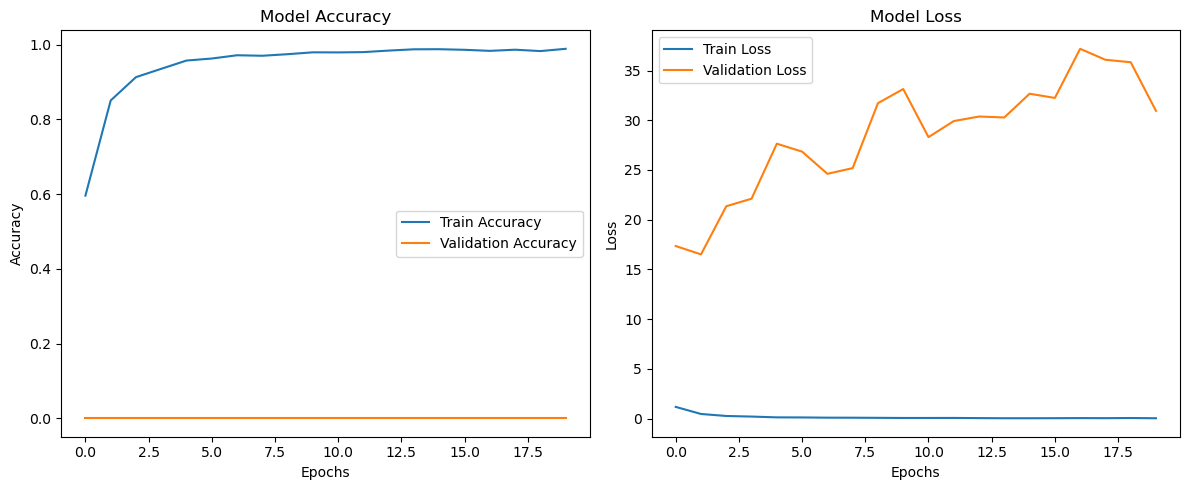

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step

✅ Test Accuracy: 77.63%

Classification Report:
              precision    recall  f1-score   support

        Bean       0.74      0.97      0.84       200
Bitter_Gourd       0.85      0.95      0.90       200
Bottle_Gourd       0.95      0.99      0.97       200
     Brinjal       0.88      0.93      0.90       200
    Broccoli       0.87      0.96      0.91       200
     Cabbage       0.53      0.96      0.69       200
    Capsicum       0.79      0.99      0.88       200
      Carrot       0.84      1.00      0.91       200
 Cauliflower       0.55      0.90      0.68       200
    Cucumber       0.90      0.97      0.94       200
      Papaya       0.91      1.00      0.95       200
      Potato       0.77      0.99      0.87       200
     Pumpkin       0.00      0.00      0.00       200
      Radish       0.00      0.00      0.00       200
      Tomato       0.00      0.00      0.00       200

    accuracy                           0.78

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


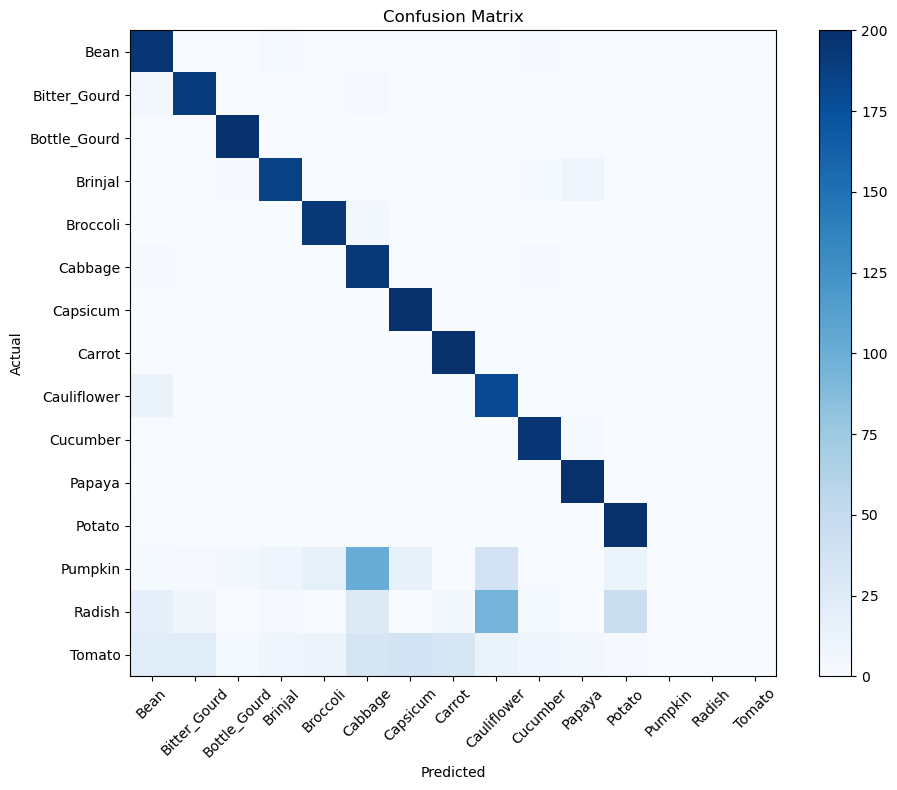

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Paths
train_dir = 'C:\\Users\\ADMIN\\Documents\\MOOC_lec\\AI_Project\\Vegetable Images\\train'
test_dir = 'C:\\Users\\ADMIN\\Documents\\MOOC_lec\\AI_Project\\Vegetable Images\\test'
IMG_HEIGHT = 128
IMG_WIDTH = 128

# Load Images Function
def load_images(data_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    class_map = {class_name: idx for idx, class_name in enumerate(class_names)}
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                images.append(img)
                labels.append(class_map[class_name])
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), to_categorical(labels), class_map

# Load and preprocess data
X_train, y_train, class_map = load_images(train_dir)
X_test, y_test, _ = load_images(test_dir)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_map), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Save the model
model.save("greenclassify_cnn_model.h5")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test data
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)
class_names = list(class_map.keys())

# Accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()